# ESE417 - Introduction to Machine Learning 
## Using Artificial Networks and K Nearest Neighbors to Classify Red Wine Quality
### Tillman James - Matt Donaldson - Will Li 
### December 15th, 2021

### Data Set Description
Inputs:
1. Fixed Acidity
2. Volatile Acidity
3. Citric Acid
4. Residual Sugar
5. Chlorides
6. Free Sulfur Dioxide
7. Total Sulfur Dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

Output: Quality (Hot coding)
Between 3-8

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd   
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

### Importing Data 

In [2]:
redWine = pd.read_csv('winequality-red2.csv',sep = ';')
redWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
redWine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
redWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### PreProcessing/ Data Cleaning

#### Histogram for Features

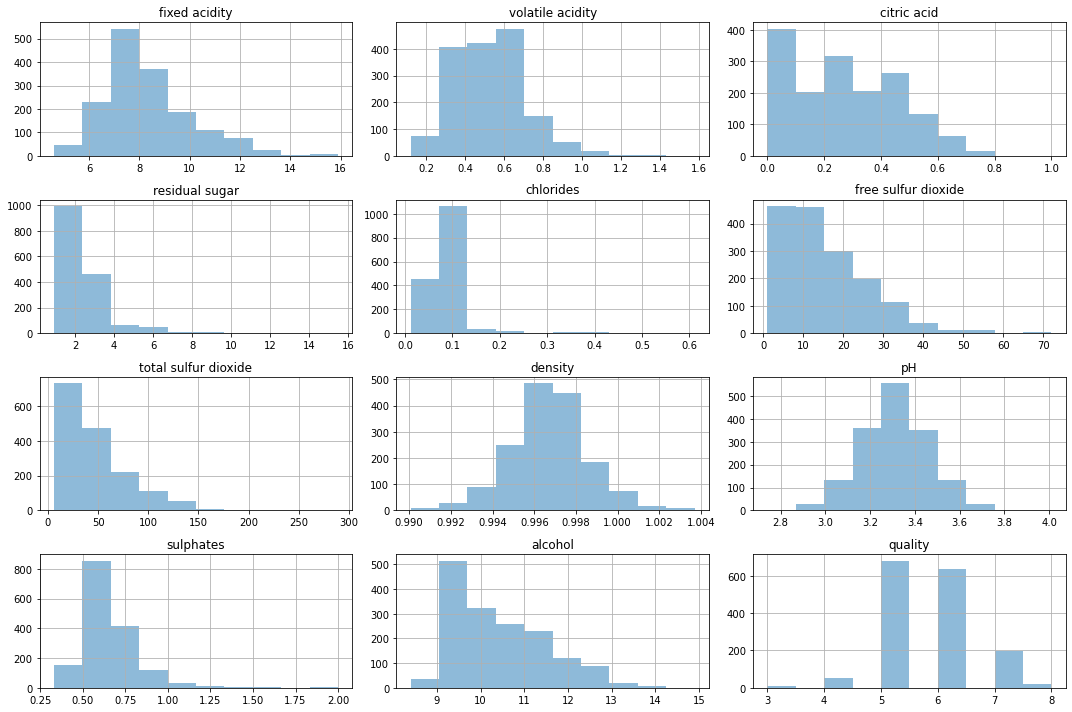

In [5]:
redWine.hist(alpha=0.5, figsize=(15, 10))
plt.tight_layout()
plt.show()

#### Dealing with the Imbalanced Dataset 

Looking at the quality histogram, we can see that classes 3, 4 and 8 could be noise in the dataset. In the data cleaning process, we can delete those noise in order to get a better model.

 (Not necessarily noise here, we just have an inbalanced data set and need to do with this.  One way to deal with this is to do what we have done and merge a few classes because "the smaller classes might just be a combination of other clases".  Other ways to deal with this would be to alter our model so that the cost funciton accounts for this imbalance or we could over or under sample our data to form a secondary data set so that the smaller classes appear to have more of a precense in the new synthetic data set.)

In [6]:
redWine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

We can see here the amount of data that fall into each class. class 5,6 and 7 have the largest amount of data and classes, 4,8 and 3 have a small amount of data. So we can merge the smaller groups in order to (deal with this imbalance) make a better model.

In [7]:
for i in range(len(redWine)):
    if redWine.iloc[i, -1] == 3:
        redWine.iloc[i, -1] = 5
        
    if redWine.iloc[i, -1] == 4:
        redWine.iloc[i, -1] = 5
        
    if redWine.iloc[i, -1] == 8:
        redWine.iloc[i, -1] = 7
        
redWine['quality'].value_counts()

5    744
6    638
7    217
Name: quality, dtype: int64

#### Principle Component Analysis

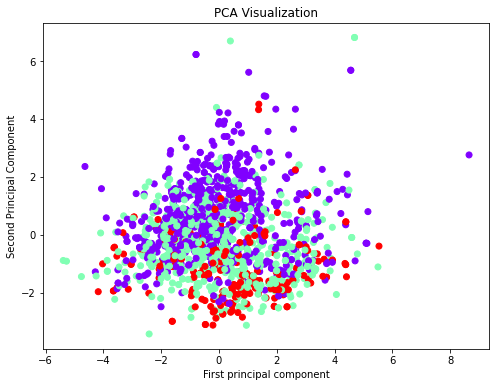

In [8]:
df_pca = redWine.copy()
X_pca = df_pca.loc[:, 'fixed acidity':'alcohol']
y_pca = df_pca['quality']

#Preprocessing in preparation for PCA: Standardizing the predictor variables
X_pca = StandardScaler().fit_transform(X_pca)

#Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)
X_pca.shape


plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pca,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title("PCA Visualization")
    
plt.show()

This is a very nonlinear data set no matter how you look at it in 2D.

In [9]:
#pca.components_
print("explained variance: ", pca.explained_variance_, "\n")
exp_var_rat = pca.explained_variance_ratio_
print("explained variance ratio: ", exp_var_rat)

explained variance:  [3.10107182 1.92711489] 

explained variance ratio:  [0.28173931 0.1750827 ]


The first principal component is only 28.2% of the variance, and the second principal component is 17.5%. So two largest principal components account for 45.7% of the variance.

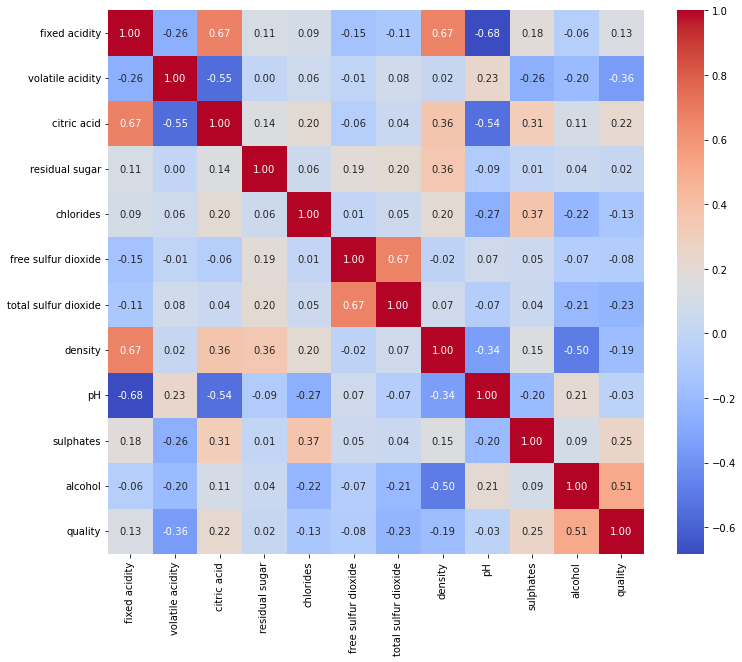

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(redWine.corr(),annot=True, cmap='coolwarm',fmt='.2f')
plt.show()

#### Scaling and Normalizing Data 

Replotted the different features after normalization and scaling to see if it changed anything. Notice that the data is still skewed. 

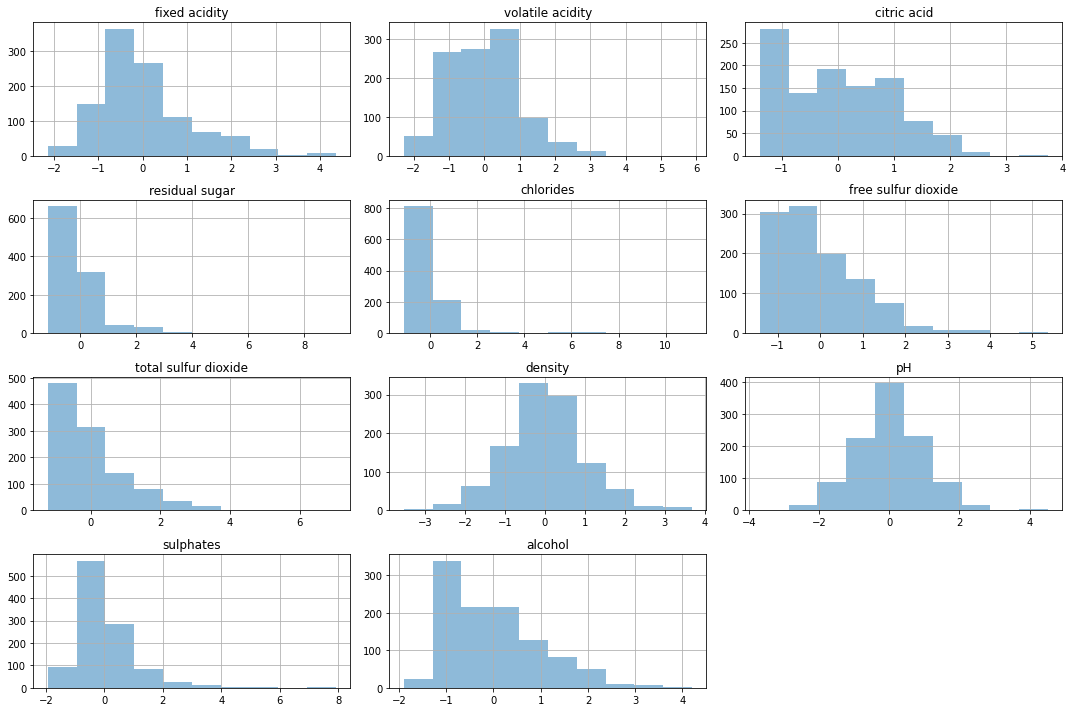

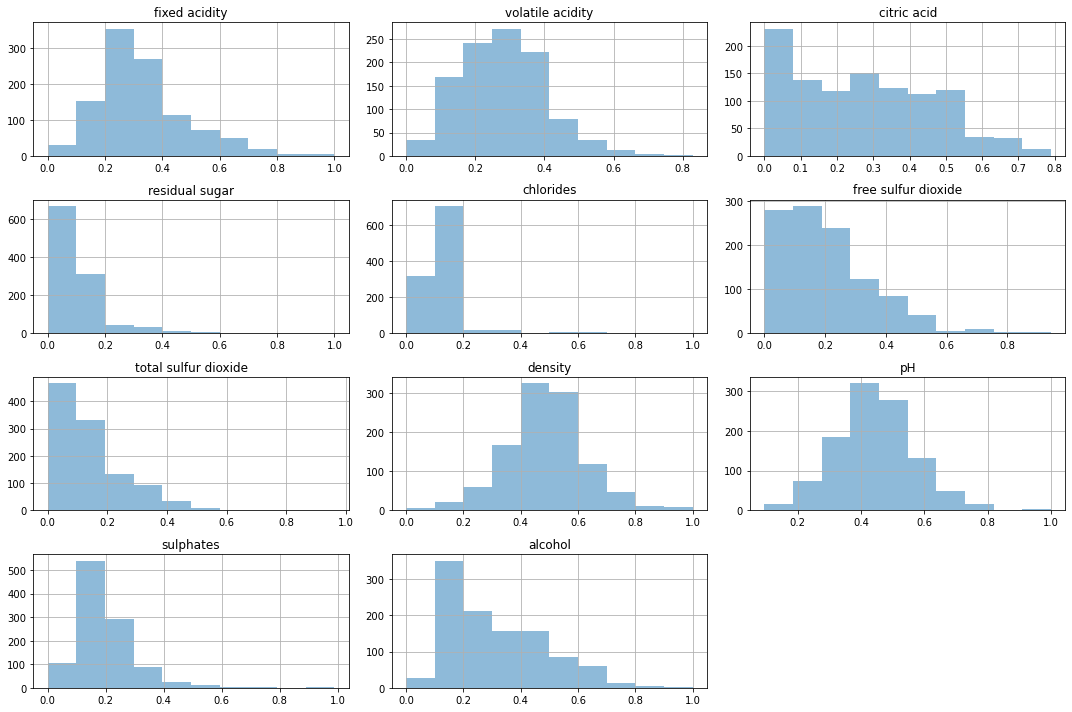

In [11]:
X = redWine.drop(['quality'], axis = 1)
X_std = StandardScaler().fit_transform(X)
X_min_max = MinMaxScaler().fit_transform(X)
y = redWine['quality']

#splitting into test and training data 
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size=0.33)
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(X_min_max, y, test_size=0.33)

# getting column titles for label
tit = redWine.columns.values.tolist()
tit = tit[:-1]

#plotting histogram for newly scaled data 
X_traind_std = pd.DataFrame(X_train_std, columns = tit)
X_traind_std.hist(alpha=0.5, figsize=(15, 10))
plt.tight_layout()
plt.title('Scaled Data')
plt.show()

#plotting histogram for newly normalized data
X_traind_mm = pd.DataFrame(X_train_mm, columns = tit)
X_traind_mm.hist(alpha=0.5, figsize=(15, 10))
plt.tight_layout()
plt.title('Normalized Data')
plt.show()

### Classifier Methods

#### KNN

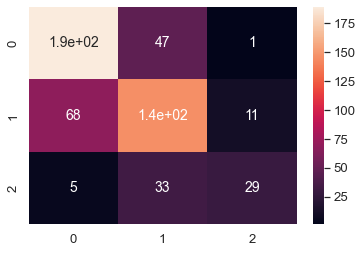

              precision    recall  f1-score   support

           5       0.72      0.80      0.76       237
           6       0.64      0.65      0.65       224
           7       0.71      0.43      0.54        67

    accuracy                           0.69       528
   macro avg       0.69      0.63      0.65       528
weighted avg       0.69      0.69      0.68       528



In [12]:
# StandardScaler

classifier_knn = KNeighborsClassifier(n_neighbors = 30, weights = 'distance')
classifier_knn.fit(X_train_std,y_train_std)
pred_knn = classifier_knn.predict(X_test_std)

confusion_matrix_knn = confusion_matrix(y_test_std,pred_knn)
redWineData_cm_knn = pd.DataFrame(confusion_matrix_knn)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm_knn, annot=True, annot_kws={"size": 14}) # font size
plt.show()

print(classification_report(y_test_std, pred_knn))

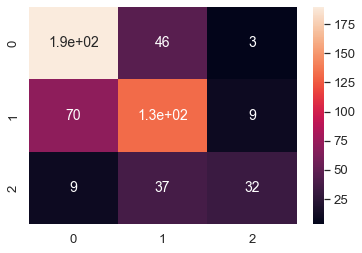

              precision    recall  f1-score   support

           5       0.71      0.79      0.75       239
           6       0.61      0.63      0.62       211
           7       0.73      0.41      0.52        78

    accuracy                           0.67       528
   macro avg       0.68      0.61      0.63       528
weighted avg       0.67      0.67      0.66       528



In [13]:
# MinMaxScaler

classifier_knn = KNeighborsClassifier(n_neighbors = 30, weights = 'distance')
classifier_knn.fit(X_train_mm,y_train_mm)
pred_knn = classifier_knn.predict(X_test_mm)

confusion_matrix_knn = confusion_matrix(y_test_mm,pred_knn)
redWineData_cm_knn = pd.DataFrame(confusion_matrix_knn)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm_knn, annot=True, annot_kws={"size": 14}) # font size
plt.show()

print(classification_report(y_test_mm, pred_knn))

#### Random Forest

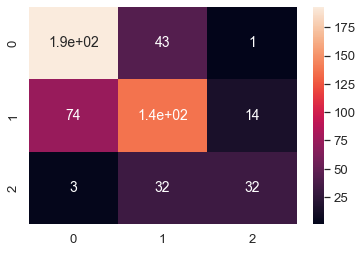

              precision    recall  f1-score   support

           5       0.71      0.81      0.76       237
           6       0.64      0.61      0.63       224
           7       0.68      0.48      0.56        67

    accuracy                           0.68       528
   macro avg       0.68      0.63      0.65       528
weighted avg       0.68      0.68      0.68       528



In [14]:
# StandardScaler

classifier_rf = RandomForestClassifier(n_estimators=200, max_depth=100,  max_features='sqrt')
classifier_rf.fit(X_train_std, y_train_std)
pred_rf = classifier_rf.predict(X_test_std)


confusion_matrix_rf = confusion_matrix(y_test_std, pred_rf)
redWineData_cm_rf = pd.DataFrame(confusion_matrix_rf)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm_rf, annot=True, annot_kws={"size": 14}) # font size
plt.show()

print(classification_report(y_test_std, pred_rf))

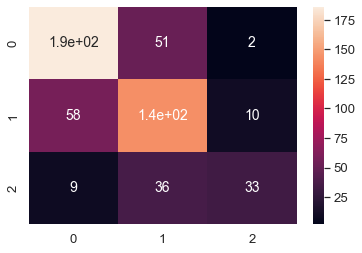

              precision    recall  f1-score   support

           5       0.74      0.78      0.76       239
           6       0.62      0.68      0.65       211
           7       0.73      0.42      0.54        78

    accuracy                           0.69       528
   macro avg       0.70      0.63      0.65       528
weighted avg       0.69      0.69      0.68       528



In [15]:
# MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=200, max_depth=100,  max_features='sqrt')
classifier_rf.fit(X_train_mm, y_train_mm)
pred_rf = classifier_rf.predict(X_test_mm)


confusion_matrix_rf = confusion_matrix(y_test_mm, pred_rf)
redWineData_cm_rf = pd.DataFrame(confusion_matrix_rf)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm_rf, annot=True, annot_kws={"size": 14}) # font size
plt.show()

print(classification_report(y_test_mm, pred_rf))

#### Artificial Neural Network 

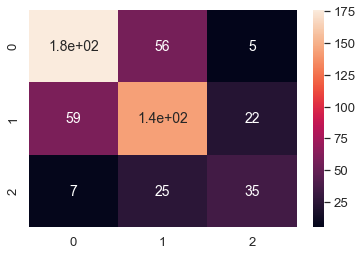

              precision    recall  f1-score   support

           5       0.73      0.74      0.73       237
           6       0.64      0.64      0.64       224
           7       0.56      0.52      0.54        67

    accuracy                           0.67       528
   macro avg       0.64      0.63      0.64       528
weighted avg       0.67      0.67      0.67       528



In [16]:
# StandardScaler

classifier_ann = MLPClassifier(solver='lbfgs', activation='relu', hidden_layer_sizes = 700)
classifier_ann.fit(X_train_std, y_train_std)
pred_ann = classifier_ann.predict(X_test_std)

confusion_matrix_ann = confusion_matrix(y_test_std,pred_ann)
redWineData_cm_ann = pd.DataFrame(confusion_matrix_ann)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm_ann, annot=True, annot_kws={"size": 14}) # font size
plt.show()

print(classification_report(y_test_std, pred_ann))

/opt/homebrew/Caskroom/miniforge/base/envs/ML417/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


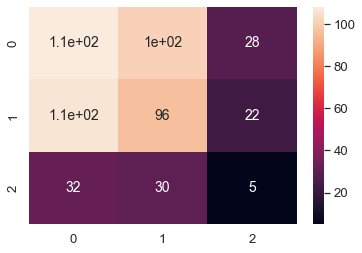

              precision    recall  f1-score   support

           5       0.71      0.73      0.72       239
           6       0.57      0.62      0.59       211
           7       0.56      0.40      0.47        78

    accuracy                           0.63       528
   macro avg       0.61      0.58      0.59       528
weighted avg       0.63      0.63      0.63       528



In [17]:
# MinMaxScaler

from sklearn.neural_network import MLPClassifier
classifier_ann = MLPClassifier(solver='lbfgs', activation='relu', hidden_layer_sizes = 700)
classifier_ann.fit(X_train_mm, y_train_mm)
pred_ann = classifier_ann.predict(X_test_mm)

confusion_matrix_ann = confusion_matrix(y_test_std,pred_ann)
redWineData_cm_ann = pd.DataFrame(confusion_matrix_ann)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm_ann, annot=True, annot_kws={"size": 14}) # font size
plt.show()

print(classification_report(y_test_mm, pred_ann))

### Hyperparameter Tuning - Grid Search

#### KNN Grid Search

In [24]:
redWine_knn = KNeighborsClassifier()
k = list(range(2,400,10))

#create a list of parameters to tune
param_grid_knn = dict(n_neighbors =  k)

#fit the model using grid search
CV_knn = GridSearchCV(estimator = redWine_knn, param_grid=param_grid_knn, cv= 6)
CV_knn.fit(X_train_std, y_train_std)

#print the result of best hyperparameters
print(CV_knn.best_params_)
#redWine_knn.get_params().keys()

{'n_neighbors': 42}


##### Random Forest Grid Search

In [20]:
redWine_rfc = RandomForestClassifier(random_state=417)

#create a list of parameters to tune
param_grid_rfc = { 
    'n_estimators': [500, 600, 700, 800],
    'max_depth': [10, 15, 20, 25, 30]
}

#fit the model using grid search
CV_rfc = GridSearchCV(estimator=redWine_rfc, param_grid=param_grid_rfc, cv= 6)
CV_rfc.fit(X_train_mm, y_train_mm)

#print the result of best hyperparameters
print(CV_rfc.best_params_)

{'max_depth': 20, 'n_estimators': 700}


#### Artificial Neural Network Grid Search

In [21]:
redWine_ann = MLPClassifier(random_state=417)

#create a list of parameters to tune
param_grid_ann = { 
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'hidden_layer_sizes' : [50,100,150,200,300],
    'max_iter' :[300]
}

#fit the model using grid search
CV_ann = GridSearchCV(estimator=redWine_ann, param_grid=param_grid_ann, cv= 6)
CV_ann.fit(X_train_std, y_train_std)

#print the result of best hyperparameters
print(CV_ann.best_params_)
## Returns the parameters that we can optimize over
#redWine_ann.get_params().keys()

/opt/homebrew/Caskroom/miniforge/base/envs/ML417/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML417/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML417/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML417/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reac

/opt/homebrew/Caskroom/miniforge/base/envs/ML417/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML417/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML417/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML417/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reac

/opt/homebrew/Caskroom/miniforge/base/envs/ML417/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML417/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML417/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML417/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reac

{'activation': 'relu', 'hidden_layer_sizes': 300, 'max_iter': 300}


/opt/homebrew/Caskroom/miniforge/base/envs/ML417/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### Model Implementation with Optimized Hyperparameters

#### KNN

42


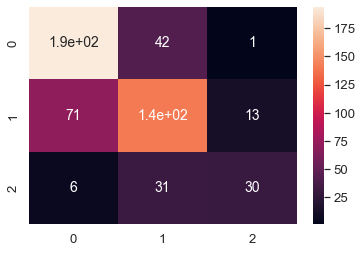

              precision    recall  f1-score   support

           5       0.72      0.82      0.76       237
           6       0.66      0.62      0.64       224
           7       0.68      0.45      0.54        67

    accuracy                           0.69       528
   macro avg       0.68      0.63      0.65       528
weighted avg       0.69      0.69      0.68       528



In [27]:
print(CV_knn.best_params_.get('n_neighbors'))
classifier_knn = KNeighborsClassifier(n_neighbors = CV_knn.best_params_.get('n_neighbors'), weights = 'distance')
classifier_knn.fit(X_train_std,y_train_std)
pred_knn = classifier_knn.predict(X_test_std)

confusion_matrix_knn = confusion_matrix(y_test_std,pred_knn)
redWineData_cm_knn = pd.DataFrame(confusion_matrix_knn)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm_knn, annot=True, annot_kws={"size": 14}) # font size
plt.show()

print(classification_report(y_test_std, pred_knn))

#### Random Forest

700
20


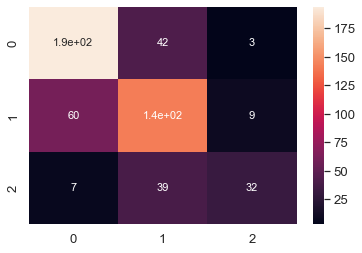

              precision    recall  f1-score   support

           5       0.74      0.81      0.78       239
           6       0.64      0.67      0.65       211
           7       0.73      0.41      0.52        78

    accuracy                           0.70       528
   macro avg       0.70      0.63      0.65       528
weighted avg       0.70      0.70      0.69       528



In [25]:
print(CV_rfc.best_params_.get('n_estimators'))
print(CV_rfc.best_params_.get('max_depth'))

classifier_rf = RandomForestClassifier(n_estimators=CV_rfc.best_params_.get('n_estimators'), 
                                       max_depth=CV_rfc.best_params_.get('max_depth'),  
                                       max_features='sqrt')
classifier_rf.fit(X_train_mm, y_train_mm)
pred_rf = classifier_rf.predict(X_test_mm)


confusion_matrix_rf = confusion_matrix(y_test_mm, pred_rf)
redWineData_cm_rf = pd.DataFrame(confusion_matrix_rf)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm_rf, annot=True, annot_kws={"size": 11}) # font size
plt.show()

print(classification_report(y_test_mm, pred_rf))

#### Artificial Neural Netowrk

relu
300
300


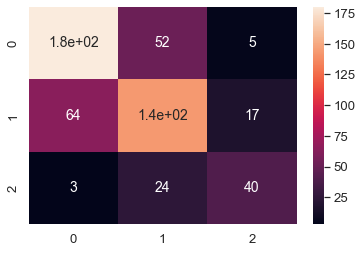

              precision    recall  f1-score   support

           5       0.73      0.76      0.74       237
           6       0.65      0.64      0.65       224
           7       0.65      0.60      0.62        67

    accuracy                           0.69       528
   macro avg       0.68      0.66      0.67       528
weighted avg       0.69      0.69      0.69       528



In [26]:
print(CV_ann.best_params_.get('activation'))
print(CV_ann.best_params_.get('hidden_layer_sizes'))
print(CV_ann.best_params_.get('max_iter'))

classifier_ann = MLPClassifier(solver='lbfgs', 
                               activation=CV_ann.best_params_.get('activation'), 
                               hidden_layer_sizes = CV_ann.best_params_.get('hidden_layer_sizes'),
                               max_iter = CV_ann.best_params_.get('max_iter'))
classifier_ann.fit(X_train_std, y_train_std)
pred_ann = classifier_ann.predict(X_test_std)

confusion_matrix_ann = confusion_matrix(y_test_std,pred_ann)
redWineData_cm_ann = pd.DataFrame(confusion_matrix_ann)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm_ann, annot=True, annot_kws={"size": 14}) # font size
plt.show()

print(classification_report(y_test_std, pred_ann))